# Sample Notebook

Welcome to the sample notebook for the XNAT Jupyter integration. This notebook is designed to demonstrate the capabilities and features of the integration and provide you with hands-on experience in leveraging Jupyter notebooks for your XNAT data analysis.

## Imports

In [1]:
!python -c "import xnat" || pip install -q "xnat==0.4.3"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pydicom
import re
import requests
import xnat

from io import StringIO
from requests.auth import HTTPBasicAuth

## Connecting to the XNAT REST API

To establish a connection between your Jupyter notebook and XNAT, XNAT adds essential environmental variables to your Jupyter server. These variables serve two main purposes:

  1. Identifying the XNAT context: The environmental variables help identify the specific XNAT instance or project from which Jupyter was launched. 
  2. Connecting to XNAT's REST API: The environmental variables provide the necessary information to establish a connection back to XNAT's REST API from inside the Jupyter container

XNAT adds environmental variables to the single-user Jupyter containers to:

  1. Identify the XNAT context in which Jupyter was started
  2. Connect back to XNAT's REST API from inside the container
  
To verify the presence and values of these environmental variables, we can print them out. Let's execute the following code snippet to display the XNAT-related environmental variables:

In [3]:
for name, value in os.environ.items():
    if 'XNAT' in name:
        print("{0}: {1}".format(name, value))

XNAT_PASS: 1HX5Dq4vNiPRfMKKpBy74LaRvcOXPj6iOmYy7Pxc4y1TvEEZxZCBR1A0DAeZw5nS
XNAT_XSI_TYPE: xnat:projectData
XNAT_DATA: /data
XNAT_ITEM_ID: C4KC-KiTS
XNAT_HOST: https://xnat.pixi.org
XNAT_USER: 69b3b6d1-cf47-4324-b2f2-2d602ff06ba1


Executing this code will output the values of the XNAT_HOST, XNAT_USER, and XNAT_PASS environmental variables, providing you with the necessary information to establish a connection with [XNAT REST API](https://wiki.xnat.org/display/XAPI/XNAT+REST+API+Directory) from within your Jupyter container. Note that the XNAT_USER and XNAT_PASS are an [alias token](https://wiki.xnat.org/documentation/how-to-use-xnat/generating-an-alias-token-for-scripted-authentication) for your XNAT account.

In [4]:
host = os.environ['XNAT_HOST']
username = os.environ['XNAT_USER']
password = os.environ['XNAT_PASS']

In [5]:
r=requests.get(f'{host}/data/projects',
               auth=HTTPBasicAuth(username, password))
if not r.ok:
        print(f'Failed to get projects')

In [6]:
projects = r.json()['ResultSet']['Result']
projects

[{'pi_firstname': '',
  'secondary_ID': 'PDMR-BL0293-F563',
  'pi_lastname': '',
  'name': 'PDMR-BL0293-F563',
  'description': 'Pre-clinical animal models of spontaneous metastatic cancer are infrequent; the few that exist are resource intensive because determination of the presence of metastatic disease, metastatic burden, and response to therapy normally require animal sacrifice and extensive pathological examination. We recently identified and characterized a patient derived xenograft model with metastatic potential, bladder xenograft BL0293-F563, developed by Jackson Laboratories and the University of California at Davis. In this study we performed a detailed imaging characterization of this model, which develops spontaneous liver and bone metastases. Using non-contrast T2 weighted MRI, hepatic metastases were demonstrated in over 70% of animals at 52 days post tumor implantation without resection of the xenograft and in 100% of animals at day 52 following resection of the xenogra

## Connecting to XNAT with XNATpy

[XNATpy](https://xnat.readthedocs.io/en/latest/) is a Python client for XNAT that provides a simplified and intuitive way to interact with XNAT objects and functions. It abstracts the complexities of making direct calls to the XNAT REST API, making it easier and more efficient to access and query XNAT data using Python. With XNATpy, you can leverage the full capabilities of XNAT while benefiting from the simplicity and convenience of a Pythonic interface.

To get started with XNATpy, create a connection:

In [7]:
connection = xnat.connect(os.environ['XNAT_HOST'], 
                          user=os.environ['XNAT_USER'], 
                          password=os.environ['XNAT_PASS'])

As of version 0.4.3, XNATpy supports the XNAT/Jupyter envrionment variables. So we can shorten this to

In [8]:
connection = xnat.connect()

Once a connection is established using XNATpy, exploring the data on the XNAT server becomes straightforward. The hierarchical structure of XNAT is mirrored as Python objects, allowing easy navigation and interaction with the data. With the connection, you gain access to comprehensive listings of projects, subjects, and experiments available on the server. This enables efficient exploration and retrieval of specific data elements from XNAT.

In [9]:
connection.projects

<XNATListing {(PDMR-BL0293-F563, PDMR-BL0293-F563): <ProjectData PDMR-BL0293-F563 (PDMR-BL0293-F563)>, (PDMR-425362-245-T, Imaging characterization of a metastatic patient derived model of melanoma): <ProjectData Imaging characterization of a metastatic patient derived model of melanoma (PDMR-425362-245-T)>, (TestProject, TestProject): <ProjectData TestProject (TestProject)>, (test, Fettig Testing): <ProjectData Fettig Testing (test)>, (TestKR, Kevin Renick Test Project): <ProjectData Kevin Renick Test Project (TestKR)>, (DogHeartMRI, Ex vivo Pig Cardiac MRI): <ProjectData Ex vivo Pig Cardiac MRI (DogHeartMRI)>, (ImplantMRI, Rat Implant MRI): <ProjectData Rat Implant MRI (ImplantMRI)>, (HNSCC_Liu, HNSCC Xenograft - MOC1 in CCR2 KO): <ProjectData HNSCC Xenograft - MOC1 in CCR2 KO (HNSCC_Liu)>, (BrainImplantMRI, Mouse Brain Implant MRI): <ProjectData Mouse Brain Implant MRI (BrainImplantMRI)>, (MRAngiography, MRAngiography): <ProjectData MRAngiography (MRAngiography)>, (mpet-mouse, mpet-

In [10]:
project = connection.projects[0] # or connection.projects["C4KC-KiTS"]
project.subjects

<XNATListing {(PIXI37_S00143, BL0293-F563-82): <SubjectData BL0293-F563-82 (PIXI37_S00143)>, (PIXI37_S00115, BL0293-F563-44): <SubjectData BL0293-F563-44 (PIXI37_S00115)>, (PIXI37_S00100, BL0293-F563-68): <SubjectData BL0293-F563-68 (PIXI37_S00100)>, (PIXI37_S00117, BL0293-F563-72): <SubjectData BL0293-F563-72 (PIXI37_S00117)>, (PIXI37_S00108, BL0293-F563-80): <SubjectData BL0293-F563-80 (PIXI37_S00108)>, (PIXI37_S00112, BL0293-F563-88): <SubjectData BL0293-F563-88 (PIXI37_S00112)>, (PIXI35_S06325, BL0293-F563-46): <SubjectData BL0293-F563-46 (PIXI35_S06325)>, (PIXI35_S06317, BL0293-F563-56): <SubjectData BL0293-F563-56 (PIXI35_S06317)>, (PIXI35_S06316, BL0293-F563-66): <SubjectData BL0293-F563-66 (PIXI35_S06316)>, (PIXI35_S06326, BL0293-F563-78): <SubjectData BL0293-F563-78 (PIXI35_S06326)>, (PIXI37_S00122, BL0293-F563-54): <SubjectData BL0293-F563-54 (PIXI37_S00122)>, (PIXI37_S00139, BL0293-F563-40): <SubjectData BL0293-F563-40 (PIXI37_S00139)>, (PIXI37_S00131, BL0293-F563-48): <Subj

In [11]:
project.experiments

<XNATListing {(PIXI35_E06131, 92158493): <MrSessionData 92158493 (PIXI35_E06131)>, (PIXI35_E06132, 65837580): <MrSessionData 65837580 (PIXI35_E06132)>, (PIXI35_E06133, 43324648): <MrSessionData 43324648 (PIXI35_E06133)>, (PIXI35_E06134, 14253180): <MrSessionData 14253180 (PIXI35_E06134)>, (PIXI35_E06135, 84015664): <MrSessionData 84015664 (PIXI35_E06135)>, (PIXI35_E06136, 40803401): <MrSessionData 40803401 (PIXI35_E06136)>, (PIXI35_E06141, 03702119): <MrSessionData 03702119 (PIXI35_E06141)>, (PIXI35_E06144, 93653076): <MrSessionData 93653076 (PIXI35_E06144)>, (PIXI35_E06145, 04537650): <MrSessionData 04537650 (PIXI35_E06145)>, (PIXI35_E06146, 80451411): <MrSessionData 80451411 (PIXI35_E06146)>, (PIXI35_E06147, 15814170): <MrSessionData 15814170 (PIXI35_E06147)>, (PIXI35_E06150, 25346574): <MrSessionData 25346574 (PIXI35_E06150)>, (PIXI35_E06153, 41447483): <MrSessionData 41447483 (PIXI35_E06153)>, (PIXI35_E06158, 41244572): <MrSessionData 41244572 (PIXI35_E06158)>, (PIXI35_E06161, 1016

For a comprehensive list of features and additional sample code, please refer to the [XNATpy documentation](https://xnat.readthedocs.io/en/latest/).

## Accessing XNAT data

When launching Jupyter from XNAT, the platform takes care of gathering the necessary configurations for your Jupyter server. This includes defining a set of mount points that expose relevant parts of the XNAT data archive to the running container. These mount points are crucial for seamlessly accessing and working with XNAT data within your Jupyter environment.

The specific mount points used for your Jupyter server may vary depending on the context in which you launched it. This flexibility allows for customized access to different datasets or projects based on your needs.

Additionally, the Jupyter container is equipped with a workspace directory where you can conveniently store your notebooks. Notebooks saved within this workspace directory will persist between Jupyter sessions, ensuring that your work is readily available when you return.

However, it is important to note that any data or notebooks stored outside of this designated workspace directory will not persist when you stop your Jupyter container. Therefore, it is recommended to store your important files within the workspace directory to avoid data loss.

Your workspace directory is located at **/workspace/{username}**. To easily reference this path within your Jupyter notebook, you can use this environmental variable:

In [12]:
os.environ['JUPYTERHUB_ROOT_DIR']

'/workspace/andrewl'

Your XNAT data is always located at **/data/projects/{project-id}/experiments/{expirement-label}**.

To explore the XNAT data that has been mounted, we can walk through the file system using the os.walk function in Python. The code snippet below demonstrates how to iterate through the directories and files within the XNAT data directory:

In [13]:
i = 0
stop = 1
for root, dirs, files in os.walk(os.environ['XNAT_DATA'], topdown=False):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))
        
   i = i + 1
   if i > stop:
       break

/data/projects/C4KC-KiTS/experiments/KiTS-00104_CT_1/SCANS/4/DICOM/1.3.6.1.4.1.14519.5.2.1.6919.4624.210777267217605788244875306408-4-105-18pp0vz.dcm
/data/projects/C4KC-KiTS/experiments/KiTS-00104_CT_1/SCANS/4/DICOM/1.3.6.1.4.1.14519.5.2.1.6919.4624.210777267217605788244875306408-4-101-1spxyhf.dcm
/data/projects/C4KC-KiTS/experiments/KiTS-00104_CT_1/SCANS/4/DICOM/1.3.6.1.4.1.14519.5.2.1.6919.4624.210777267217605788244875306408-4-44-3201om.dcm
/data/projects/C4KC-KiTS/experiments/KiTS-00104_CT_1/SCANS/4/DICOM/1.3.6.1.4.1.14519.5.2.1.6919.4624.210777267217605788244875306408-4-51-6k1qy5.dcm
/data/projects/C4KC-KiTS/experiments/KiTS-00104_CT_1/SCANS/4/DICOM/1.3.6.1.4.1.14519.5.2.1.6919.4624.210777267217605788244875306408-4-108-1yv5jzg.dcm
/data/projects/C4KC-KiTS/experiments/KiTS-00104_CT_1/SCANS/4/DICOM/1.3.6.1.4.1.14519.5.2.1.6919.4624.210777267217605788244875306408-4-56-inhzvh.dcm
/data/projects/C4KC-KiTS/experiments/KiTS-00104_CT_1/SCANS/4/DICOM/1.3.6.1.4.1.14519.5.2.1.6919.4624.21077

In [14]:
project = connection.projects[os.environ['XNAT_ITEM_ID']] # Assuming you started Jupyter from an XNAT project
exp = project.experiments[0]

Starting from version 0.4.3, XNATpy includes support for the XNAT/Jupyter integration. It is now capable of understanding the layout of the XNAT/Jupyter filesystem, allowing it to locate data on the filesystem before resorting to downloading from XNAT. To observe this functionality in action, we can increase the log level and see the 'Opening file from filesystem!' log statements.

[INFO] Token login successfully as andrewl
[INFO] GET URI https://xnat.pixi.org/data/JSESSION
[INFO] Determining XNAT version
[INFO] GET URI https://xnat.pixi.org/data/version
[INFO] GET URI https://xnat.pixi.org/xapi/siteConfig/buildInfo?format=json
[INFO] Found an 1.8 version (1.8.8.1)
[INFO] Start parsing schemas and building object model
[INFO] GET URI https://xnat.pixi.org/xapi/schemas?format=json
[INFO] GET URI https://xnat.pixi.org/xapi/schemas/pixi
[INFO] GET URI https://xnat.pixi.org/xapi/schemas/security
[INFO] GET URI https://xnat.pixi.org/xapi/schemas/roi
[INFO] GET URI https://xnat.pixi.org/xapi/schemas/pipeline/repository
[INFO] GET URI https://xnat.pixi.org/xapi/schemas/pipeline/workflow
[INFO] GET URI https://xnat.pixi.org/xapi/schemas/pipeline/build
[INFO] GET URI https://xnat.pixi.org/xapi/schemas/birn/birnprov
[INFO] GET URI https://xnat.pixi.org/xapi/schemas/assessments
[INFO] GET URI https://xnat.pixi.org/xapi/schemas/xdat
[INFO] GET URI https://xnat.pixi.org/xapi/

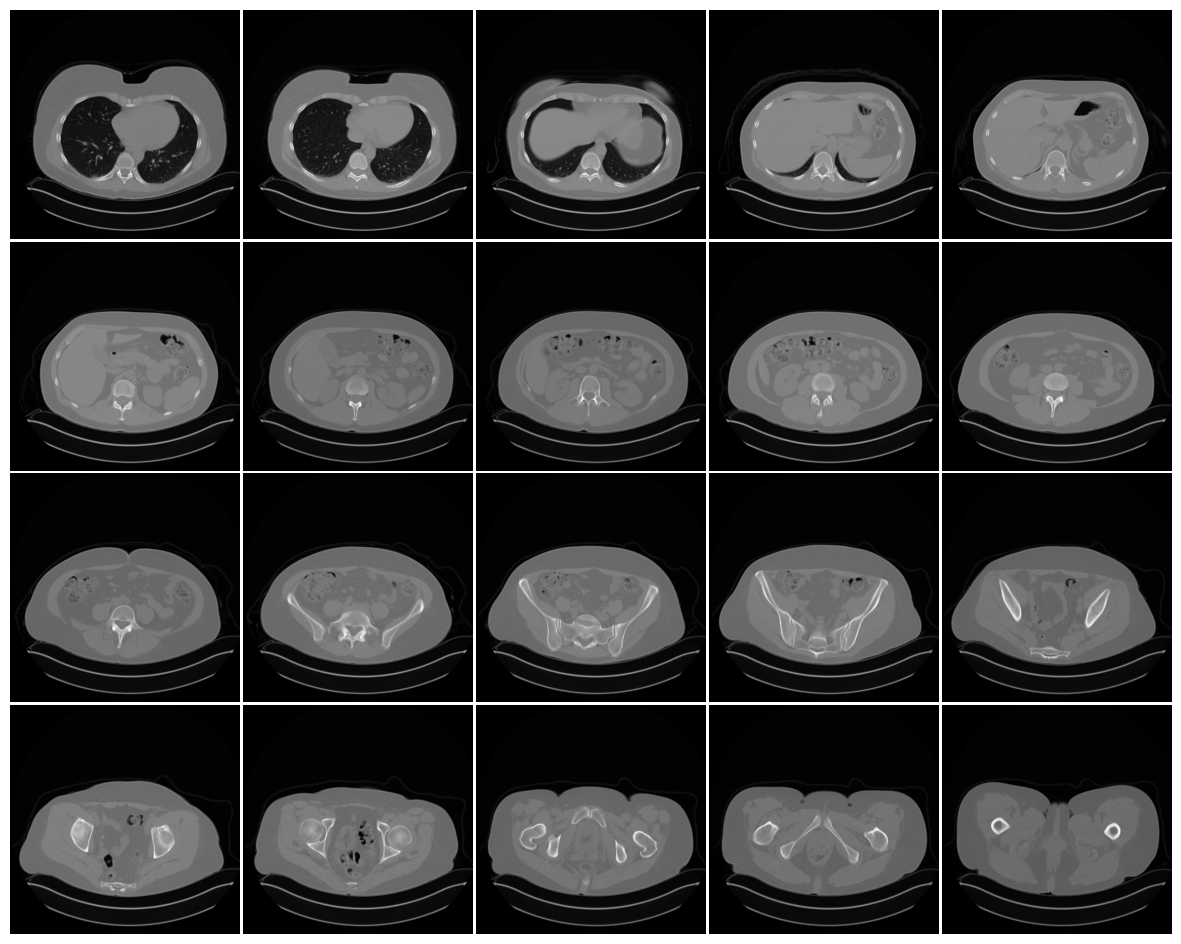

In [15]:
# Connect to XNAT
connection = xnat.connect(loglevel='INFO')

# Update project / experiment / scan / file for your data
project = connection.projects['C4KC-KiTS']
experiment = project.experiments['KiTS-00000_CT_1']
scan = experiment.scans['5']

def plot_dicom_images(scan, rows=4, cols=5, invert=False):
    file_list = list(filter(lambda k: k.endswith('.dcm'), list(scan.files)))
    file_list = sorted(file_list, key=lambda x: int(re.split(r'-', x)[2]))

    num_scans = min(rows * cols, len(file_list))

    # Calculate the figure size dynamically based on rows and columns
    figsize = (cols * 3, rows * 3)

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.01, hspace=0.01)  # Adjust subplot spacing

    # Plot the images
    for i, j in zip(range(num_scans), np.linspace(0, len(file_list) - 1, num=num_scans)):
        file = file_list[int(j)]
        ds = pydicom.dcmread(scan.files[file].open())

        image = ds.pixel_array
        if invert:
            image = np.max(image) - image  # Invert the image

        row = i // cols
        col = i % cols

        axs[row, col].imshow(image, cmap=plt.cm.gray)
        axs[row, col].axis('off')  # Hide axis labels and ticks

    plt.show()
    
plot_dicom_images(scan)

## Converting XNAT Stored Searches to DataFrames
In order to convert a stored search in XNAT into a pandas DataFrame, you will first need to create a stored search in XNAT by referring to the [guide on saving a data table as a stored search](https://wiki.xnat.org/documentation/how-to-use-xnat/using-the-standard-search/saving-a-data-table-as-a-stored-search). This example assumes a search of CT Scans joined with the Subject table.

Begin by making use of the [Stored Search API](https://wiki.xnat.org/display/XAPI/Stored+Search+API) to retrieve the list of stored searches.

In [16]:
host = os.environ['XNAT_HOST']
username = os.environ['XNAT_USER']
password = os.environ['XNAT_PASS']

In [17]:
r = requests.get(f'{host}/data/search/saved',
                 auth=HTTPBasicAuth(username, password))

if not r.ok:
        print(f'Failed to get searches')

In [18]:
searches = r.json()['ResultSet']['Result']
searches

[{'allow_diff_columns': '1',
  'stored_search_info': '26',
  'extension': '6',
  'sort_by_field_id': '',
  'brief_description': 'C4KC-KiTS CT Scans',
  'description': '',
  'layeredsequence': '',
  'secure': '1',
  'users': '{andrewl}',
  'root_element_name': 'xnat:ctScanData',
  'id': 'xs1686752401398',
  'tag': '',
  'sort_by_element_name': ''}]

Get the id of your stored search

In [19]:
search_id = 'xs1686752401398'
r = requests.get(f'{host}/data/search/saved/{search_id}/results?format=csv&guiStyle=true', 
                 auth=HTTPBasicAuth(username, password))
df = pd.read_csv(StringIO(r.text), sep=",")

Lets add the path to each scan to the dataframe.

In [20]:
df = df.assign(path="/data/projects/" + df["project"] + "/experiments/" + df["Session Label"] + "/SCANS/" + df["id"].astype(str) + "/DICOM")

Filter out unused columns. This can also be done directly in the XNAT stored search.

In [21]:
df = df[["project", "Session Label", "id", "series_description", "M/F", "bodyPartExamined", "path"]]

Lets select only abdomen arterial contrasts scans.

In [22]:
df = df.loc[(df["bodyPartExamined"] == "ABDOMEN") & (df["series_description"] == "arterial")]
df

,project,Session Label,id,series_description,M/F,bodyPartExamined,path
1,C4KC-KiTS,KiTS-00009_CT_1,5,arterial,F,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0000...
3,C4KC-KiTS,KiTS-00007_CT_1,5,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0000...
7,C4KC-KiTS,KiTS-00010_CT_1,4,arterial,F,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0001...
9,C4KC-KiTS,KiTS-00008_CT_1,3,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0000...
11,C4KC-KiTS,KiTS-00004_CT_1,7,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0000...
...,...,...,...,...,...,...,...
292,C4KC-KiTS,KiTS-00140_CT_1,6,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0014...
294,C4KC-KiTS,KiTS-00201_CT_1,3,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0020...
296,C4KC-KiTS,KiTS-00144_CT_1,2,arterial,F,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0014...
298,C4KC-KiTS,KiTS-00104_CT_1,4,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0010...


You can then further refine your selection say based on gender.

In [23]:
df.loc[(df["M/F"] == "M")]

,project,Session Label,id,series_description,M/F,bodyPartExamined,path
3,C4KC-KiTS,KiTS-00007_CT_1,5,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0000...
9,C4KC-KiTS,KiTS-00008_CT_1,3,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0000...
11,C4KC-KiTS,KiTS-00004_CT_1,7,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0000...
16,C4KC-KiTS,KiTS-00002_CT_1,10,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0000...
20,C4KC-KiTS,KiTS-00001_CT_1,5,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0000...
...,...,...,...,...,...,...,...
284,C4KC-KiTS,KiTS-00125_CT_1,2,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0012...
285,C4KC-KiTS,KiTS-00186_CT_1,2,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0018...
292,C4KC-KiTS,KiTS-00140_CT_1,6,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0014...
294,C4KC-KiTS,KiTS-00201_CT_1,3,arterial,M,ABDOMEN,/data/projects/C4KC-KiTS/experiments/KiTS-0020...
